In [1]:
from load_data.utils import process_all_documents
from load_data import load_dataframe, process_text
from plots import plot_counter_lemmas
from plots.topics import interactive_exploration, plot_topics, plot_similarities
from topic_modeling.utils import check_coherence_for_topics_num
from topic_modeling.lda_model import find_best_model, find_best_topics_num
from topic_modeling.topic_probs import (
    get_similarities,
    get_topic_probs,
    calculate_distance_matrix,
    calculate_linkage_matrix,
    topic_probs_by_column_binded,
    get_hierarchical_clusters
)

import pandas as pd
from collections import Counter


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/joblib/backports.py:7: DeprecationWarning: The distutils package is deprecated and slated for removal in Python 3.12. Use setuptools or check PEP 632 for potential alternatives
  from distutils.version import LooseVersion


In [17]:
topic_probs = pd.read_csv("../data/final_data/Decarbonisation_probs.csv")
topic_probs = topic_probs.drop(['c1','c2','u1','u2'], axis=1).set_index('country')
linkage = calculate_linkage_matrix(topic_probs/3)
similarities = get_similarities(topic_probs/3)
dist_matrix = calculate_distance_matrix(topic_probs/3)

<Figure size 1200x800 with 0 Axes>

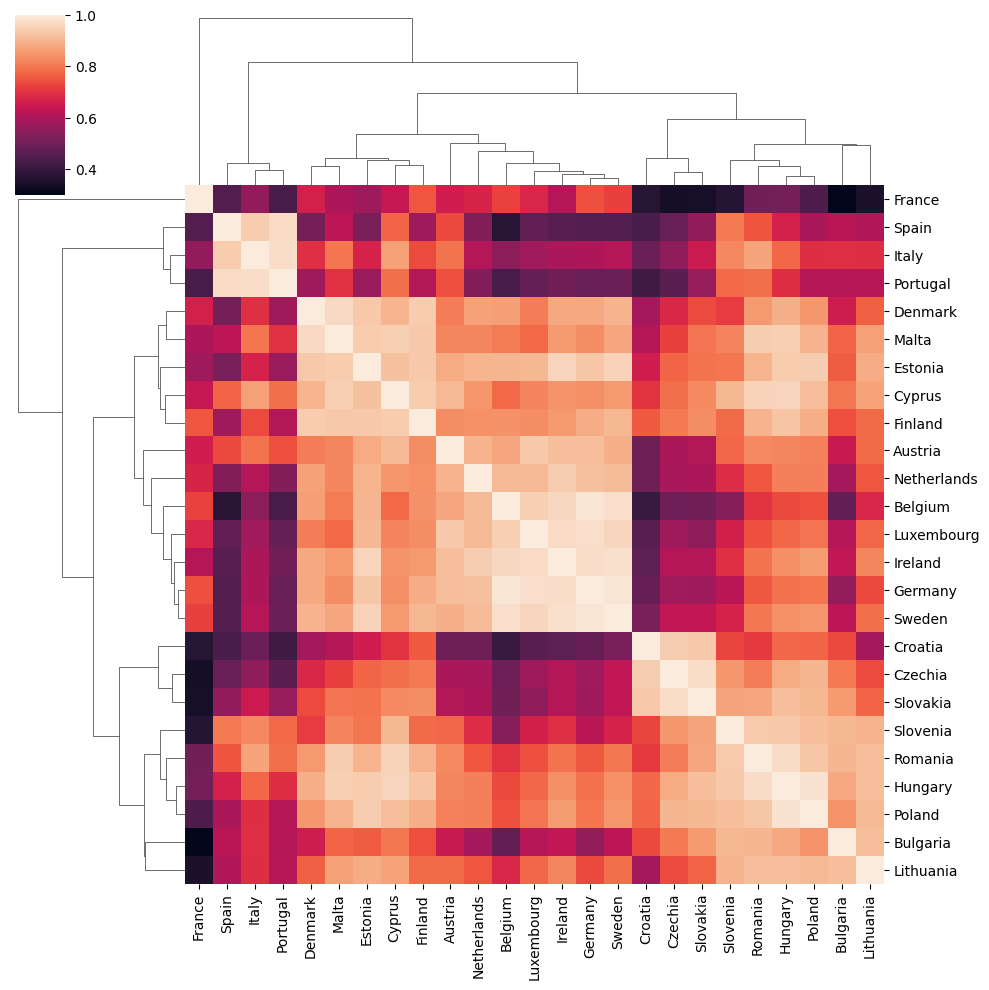

In [18]:
plot_similarities(similarities, topic_probs, linkage)

In [20]:
cluster = get_hierarchical_clusters(linkage, 0.09)
decarb_clust = pd.DataFrame({'country': topic_probs.index, 'cluster_decarb': cluster})

<Figure size 1200x800 with 0 Axes>

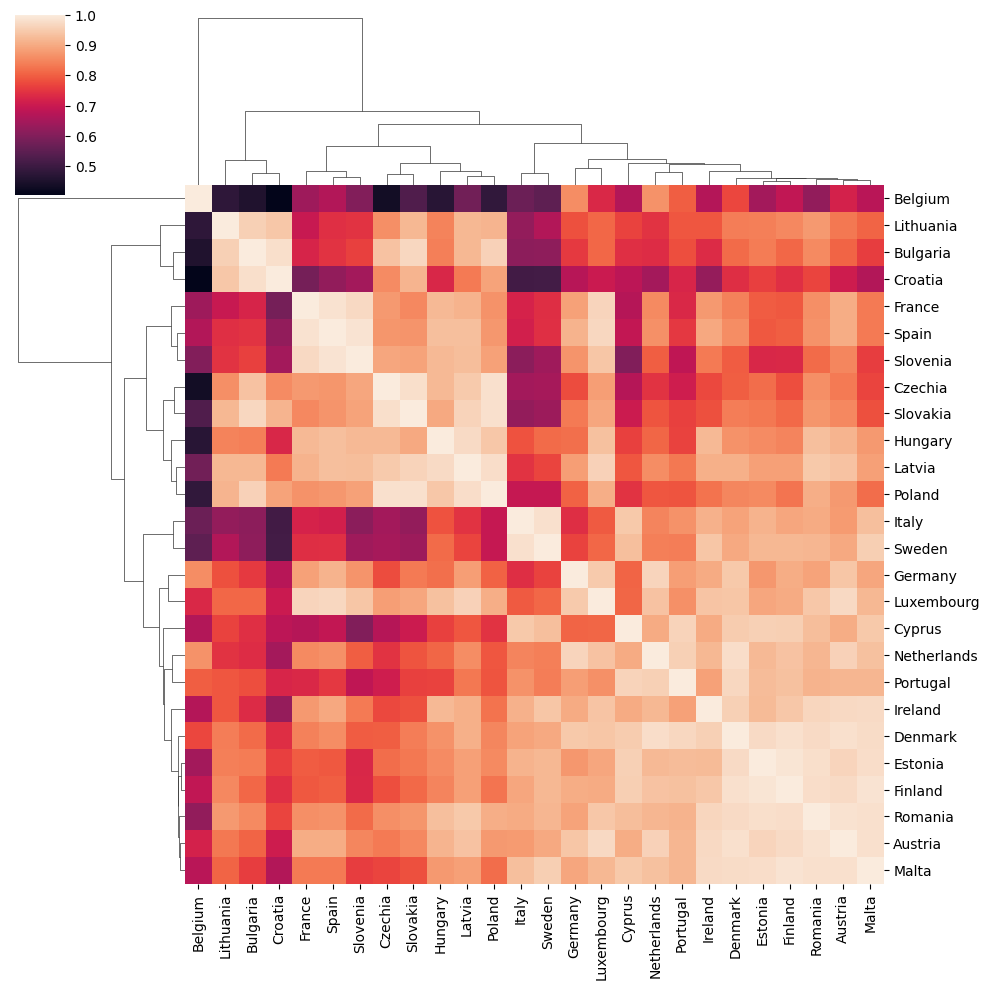

In [22]:
topic_probs = pd.read_csv("../data/final_data/Energy_efficiency_probs.csv")
topic_probs = topic_probs.drop(['c1','c2','u1','u2'], axis=1).set_index('country')
linkage = calculate_linkage_matrix(topic_probs/3)
similarities = get_similarities(topic_probs/3)
dist_matrix = calculate_distance_matrix(topic_probs/3)
plot_similarities(similarities, topic_probs, linkage)

In [24]:
cluster = get_hierarchical_clusters(linkage, 0.044)
enef_clust = pd.DataFrame({'country': topic_probs.index, 'cluster_enef': cluster})

<Figure size 1200x800 with 0 Axes>

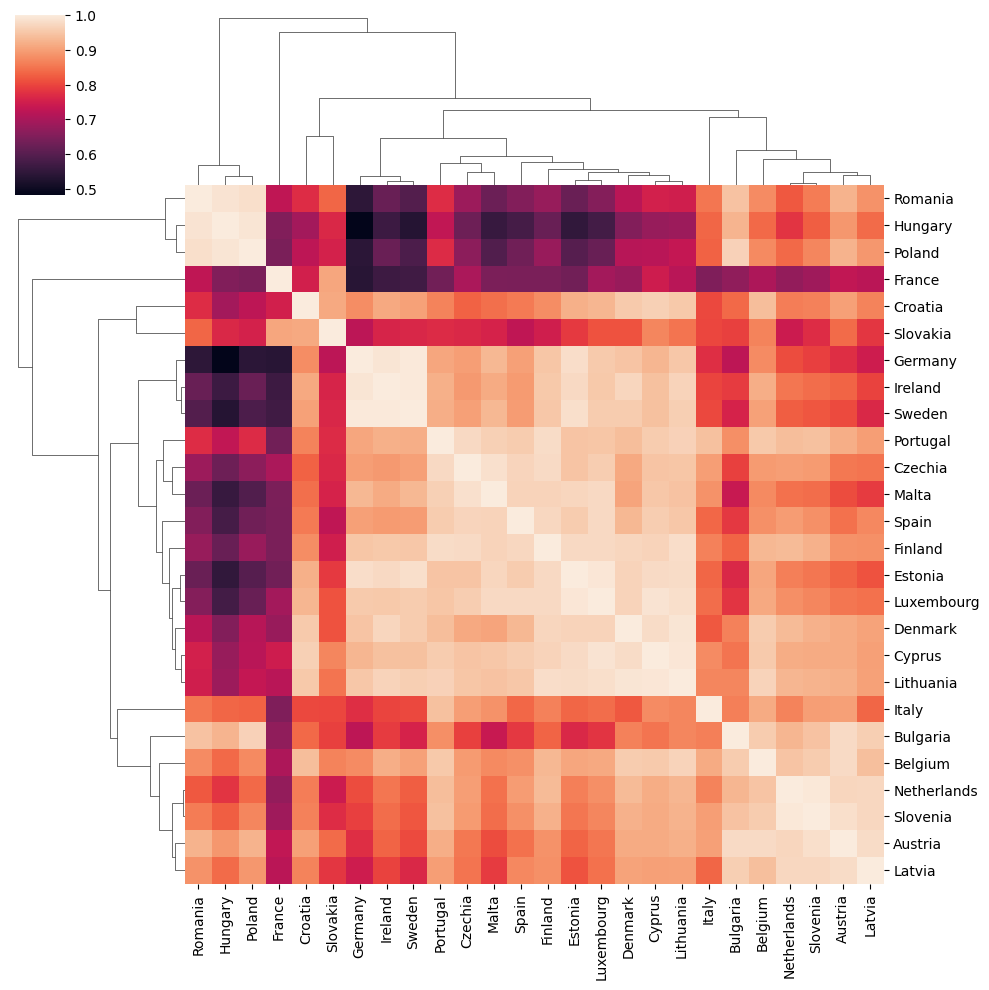

In [27]:
topic_probs = pd.read_csv("../data/final_data/Energy_security_probs.csv")
topic_probs = topic_probs.drop(['c1','c2','u1','u2'], axis=1).set_index('country')
linkage = calculate_linkage_matrix(topic_probs/3)
similarities = get_similarities(topic_probs/3)
dist_matrix = calculate_distance_matrix(topic_probs/3)
plot_similarities(similarities, topic_probs, linkage)

In [28]:
cluster = get_hierarchical_clusters(linkage, 0.05)
ensec_clust = pd.DataFrame({'country': topic_probs.index, 'cluster_ensec': cluster})

<Figure size 1200x800 with 0 Axes>

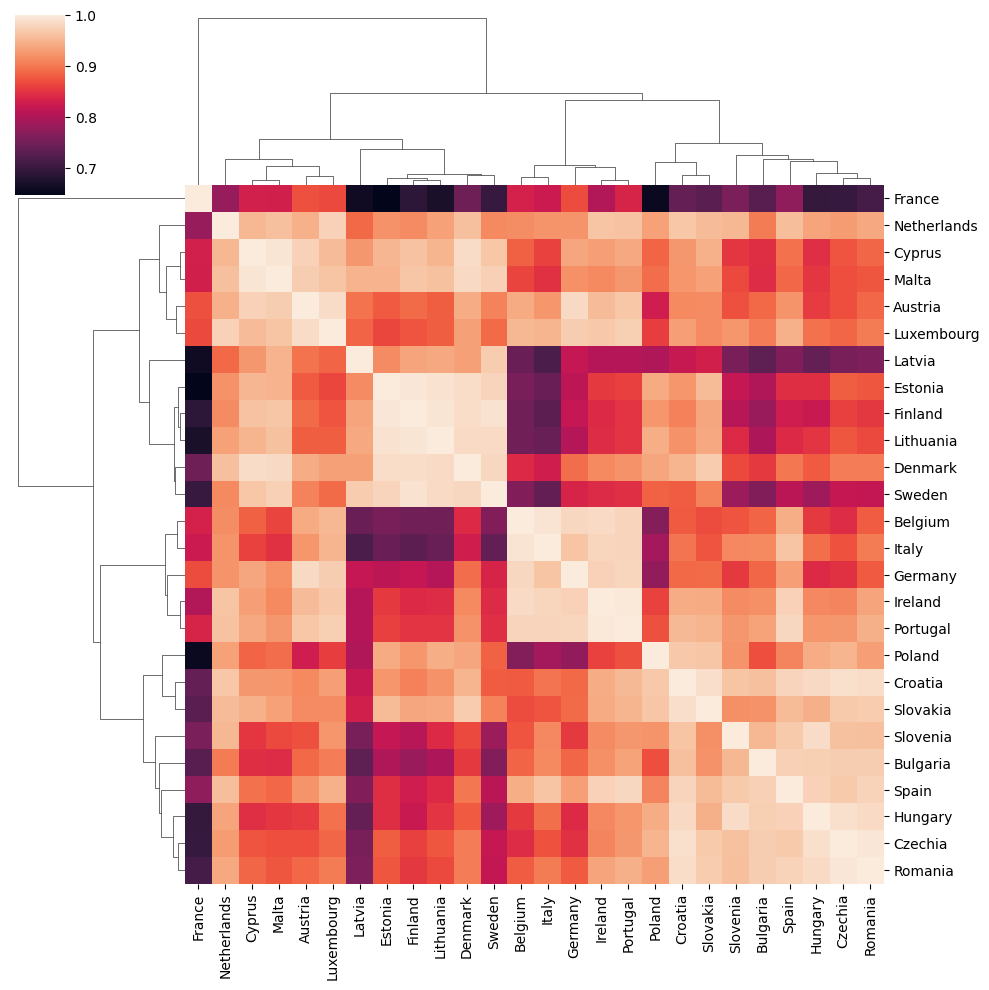

In [31]:
topic_probs = pd.read_csv("../data/final_data/Internal_market_probs.csv")
topic_probs = topic_probs.drop(['c1','c2','u1','u2'], axis=1).set_index('country')
linkage = calculate_linkage_matrix(topic_probs/3)
similarities = get_similarities(topic_probs/3)
dist_matrix = calculate_distance_matrix(topic_probs/3)
plot_similarities(similarities, topic_probs, linkage)

In [32]:
cluster = get_hierarchical_clusters(linkage, 0.0355)
intmar_clust = pd.DataFrame({'country': topic_probs.index, 'cluster_intmar': cluster})

<Figure size 1200x800 with 0 Axes>

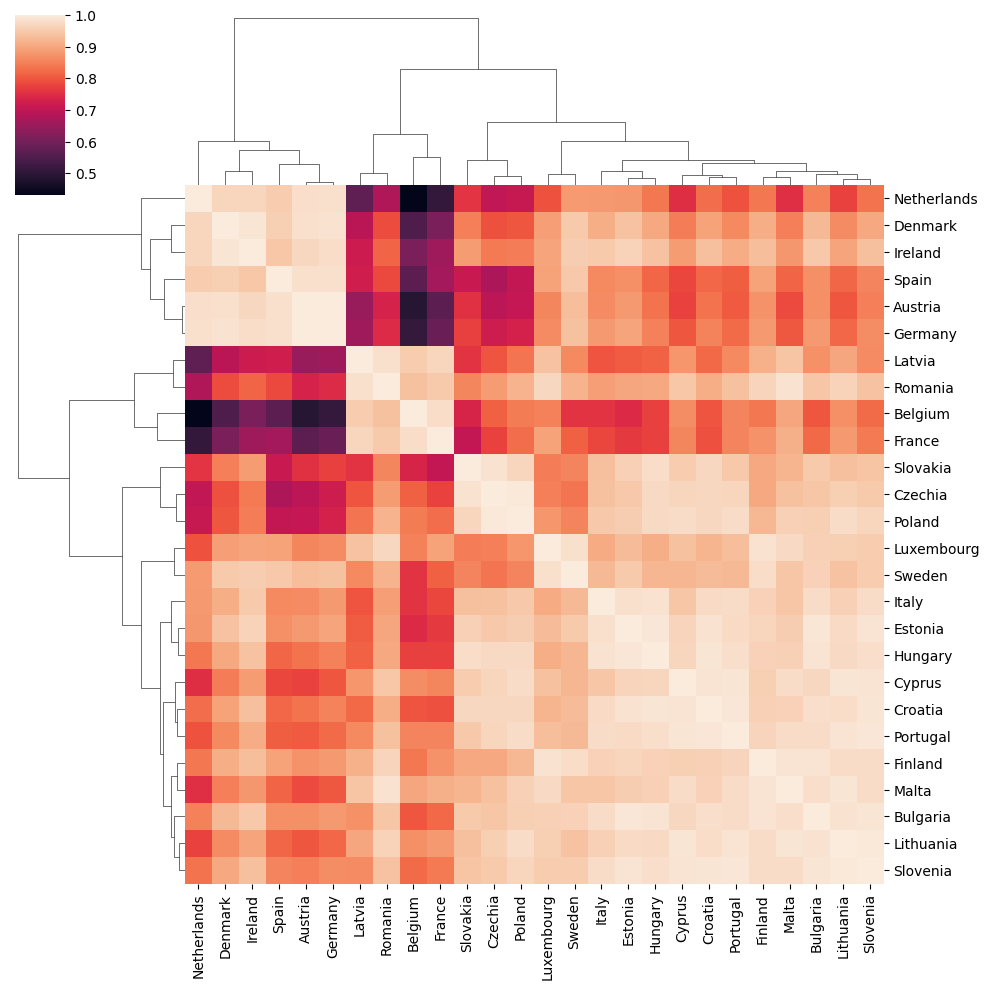

In [34]:
topic_probs = pd.read_csv("../data/final_data/R&I_and_Competitiveness_probs.csv")
topic_probs = topic_probs.drop(['c1','c2','u1','u2'], axis=1).set_index('country')
linkage = calculate_linkage_matrix(topic_probs/3)
similarities = get_similarities(topic_probs/3)
dist_matrix = calculate_distance_matrix(topic_probs/3)
plot_similarities(similarities, topic_probs, linkage)

In [35]:
cluster = get_hierarchical_clusters(linkage, 0.0433)
ri_clust = pd.DataFrame({'country': topic_probs.index, 'cluster_ri': cluster})

In [38]:
clust_df = decarb_clust.merge(enef_clust, how='inner', on='country')\
                       .merge(ensec_clust, how='inner', on='country')\
                       .merge(intmar_clust, how='inner', on='country')\
                       .merge(ri_clust, how='inner', on='country')

In [39]:
clust_df

,country,cluster_decarb,cluster_enef,cluster_ensec,cluster_intmar,cluster_ri
0,Austria,3,6,6,1,1
1,Belgium,3,7,6,3,2
2,Bulgaria,5,1,6,5,4
3,Czechia,4,3,5,5,3
4,Cyprus,2,6,5,1,4
5,Germany,3,5,4,3,1
6,Denmark,2,6,5,2,1
7,Estonia,2,6,5,2,4
8,Croatia,4,1,2,4,4
9,Finland,2,6,5,2,4


In [40]:
clust_df.to_csv("topic_modelling_clusters.csv")